# 시계열 분해 : 추세 , 계절성, 주기, 불규칙성 요소 분리하여 시각화 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose

### 시계열 데이터 생성 

In [2]:
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100)

# 데이터 프레임 생성 
data = pd.DataFrame({
    'Date' : dates, 
    'Value' : values
})

print(data)

         Date     Value
0  2023-01-01  0.496714
1  2023-01-02 -0.138264
2  2023-01-03  0.647689
3  2023-01-04  1.523030
4  2023-01-05 -0.234153
..        ...       ...
95 2023-04-06 -1.463515
96 2023-04-07  0.296120
97 2023-04-08  0.261055
98 2023-04-09  0.005113
99 2023-04-10 -0.234587

[100 rows x 2 columns]


### 시계열 분해 

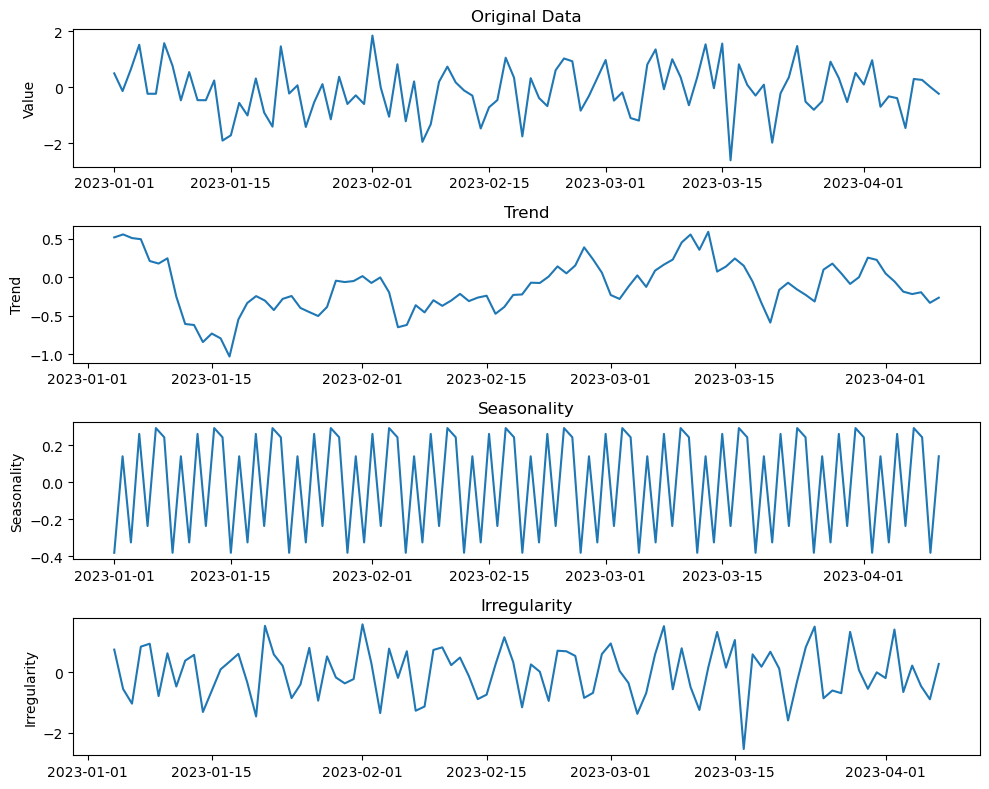

In [3]:
# 시계열 분해 
result = seasonal_decompose(data['Value'], model='additive', period=7)

# 분해 결과 시각화 
plt.figure(figsize=(10,8))

# 원본 데이터 
plt.subplot(4,1,1)
plt.plot(data['Date'], data['Value'])
plt.title('Original Data')
plt.ylabel('Value')

# 추세 데이터 
plt.subplot(4,1,2)
plt.plot(data['Date'], result.trend)
plt.title('Trend')
plt.ylabel('Trend')

# 계절성 데이터 
plt.subplot(4,1,3)
plt.plot(data['Date'], result.seasonal)
plt.title('Seasonality')
plt.ylabel('Seasonality')

# 불규칙성 데이터 
plt.subplot(4,1,4)
plt.plot(data['Date'], result.resid)
plt.title('Irregularity')
plt.ylabel('Irregularity')

plt.tight_layout()
plt.show()